<a href="https://colab.research.google.com/github/Harshi-63/AI-Lab/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import time

In [11]:
# Create a sample graph representing a city map
def create_city_graph():
    city_graph = nx.Graph()
    # Add edges (roads) between intersections (nodes)
    city_graph.add_edges_from([
        ("A", "B"), ("A", "C"), ("B", "D"), ("C", "D"), ("C", "E"),
        ("D", "F"), ("E", "F"), ("E", "G"), ("F", "H"), ("G", "H"),
    ])
    return city_graph


In [12]:
# Bi-directional BFS implementation
def bidirectional_bfs(graph, start, goal):
    if start == goal:
        return [start], 1  # Path and nodes explored

    front_queue = deque([start])
    back_queue = deque([goal])
    front_visited = {start: None}
    back_visited = {goal: None}
    nodes_explored = 0

    while front_queue and back_queue:
        nodes_explored += 1
        if explore_level(graph, front_queue, front_visited, back_visited):
            path = reconstruct_path(front_visited, back_visited, start, goal)
            return path, nodes_explored

        nodes_explored += 1
        if explore_level(graph, back_queue, back_visited, front_visited):
            path = reconstruct_path(front_visited, back_visited, start, goal)
            return path, nodes_explored

    return None, nodes_explored

In [13]:
def explore_level(graph, queue, visited, other_visited):
    current = queue.popleft()
    for neighbor in graph.neighbors(current):
        if neighbor not in visited:
            visited[neighbor] = current
            queue.append(neighbor)
            if neighbor in other_visited:
                return True
    return False

def reconstruct_path(front_visited, back_visited, start, goal):
    path = []
    node = next(iter(set(front_visited) & set(back_visited)))
     # Reconstruct from start to meeting point
    while node:
        path.append(node)
        node = front_visited[node]
    path.reverse()

    # Reconstruct from meeting point to goal
    node = next(iter(set(front_visited) & set(back_visited)))
    node = back_visited[node]
    while node:
        path.append(node)
        node = back_visited[node]

    return path

In [14]:
def bfs(graph, start, goal):
    queue = deque([start])
    visited = {start: None}
    nodes_explored = 0

    while queue:
        nodes_explored += 1
        current = queue.popleft()
        if current == goal:
            path = reconstruct_single_path(visited, start, goal)
            return path, nodes_explored

        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                visited[neighbor] = current
                queue.append(neighbor)

    return None, nodes_explored


In [15]:
# Standard DFS implementation
def dfs(graph, start, goal):
    stack = [start]
    visited = {start: None}
    nodes_explored = 0

    while stack:
        nodes_explored += 1
        current = stack.pop()
        if current == goal:
            path = reconstruct_single_path(visited, start, goal)
            return path, nodes_explored

        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                visited[neighbor] = current
                stack.append(neighbor)

    return None, nodes_explored

def reconstruct_single_path(visited, start, goal):
    path = []
    node = goal
    while node:
        path.append(node)
        node = visited[node]
    return path[::-1]

In [16]:
# Visualize the search process
def visualize_graph(graph, path=None):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_color="lightblue", node_size=500)
    if path:
        edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
        nx.draw_networkx_edges(graph, pos, edgelist=edges, edge_color="red", width=2)
    plt.show()

# Compare performance
def compare_algorithms(graph, start, goal):
    algorithms = {
        "Bi-directional BFS": bidirectional_bfs,
        "BFS": bfs,
        "DFS": dfs
    }
    for name, algorithm in algorithms.items():
        start_time = time.time()
        path, nodes_explored = algorithm(graph, start, goal)
        end_time = time.time()
        print(f"{name} Path: {path}, Nodes Explored: {nodes_explored}, Time: {end_time - start_time:.6f}s")

Visualizing City Map:


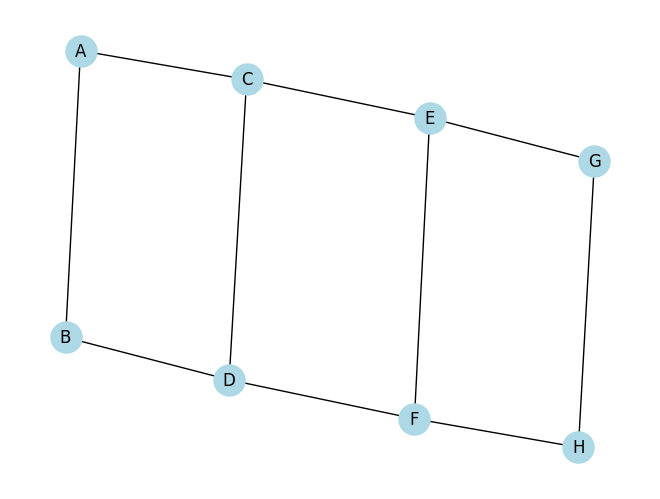


Comparing Algorithms:
Bi-directional BFS Path: ['A', 'B', 'D', 'F', 'H'], Nodes Explored: 4, Time: 0.000036s
BFS Path: ['A', 'B', 'D', 'F', 'H'], Nodes Explored: 8, Time: 0.000025s
DFS Path: ['A', 'C', 'E', 'G', 'H'], Nodes Explored: 5, Time: 0.000020s


In [17]:
# Main function
def main():
    graph = create_city_graph()
    start, goal = "A", "H"

    print("Visualizing City Map:")
    visualize_graph(graph)

    print("\nComparing Algorithms:")
    compare_algorithms(graph, start, goal)

if __name__ == "__main__":
    main()

